In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist=keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names=['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

DATA EXPLORATION

In [13]:
X_test.shape

(10000, 28, 28)

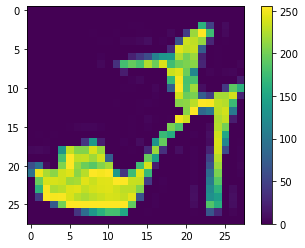

In [14]:
plt.figure()
plt.imshow(X_train[9])
plt.colorbar()

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

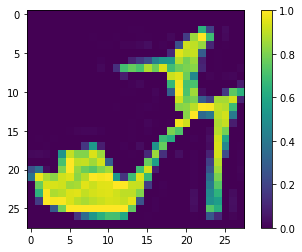

In [16]:
#putting the scale bar between 0 and 1
X_train=X_train/255.0
X_test=X_test/255.0
plt.figure()
plt.imshow(X_train[9])
plt.colorbar()

Build the model on TF 2.0

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [30]:
model=Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 19)                2451      
Total params: 102,931
Trainable params: 102,931
Non-trainable params: 0
_________________________________________________________________


Model compilation
-Loss Function
-Optimiser
-Metrics

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 382us/sample - loss: 0.5072 - accuracy: 0.8198 - val_loss: 0.4591 - val_accuracy: 0.8403
Epoch 2/10
48000/48000 [==============================] - 16s 332us/sample - loss: 0.3800 - accuracy: 0.8616 - val_loss: 0.3705 - val_accuracy: 0.8668
Epoch 3/10
48000/48000 [==============================] - 25s 523us/sample - loss: 0.3405 - accuracy: 0.8749 - val_loss: 0.3414 - val_accuracy: 0.8775
Epoch 4/10
48000/48000 [==============================] - 27s 554us/sample - loss: 0.3163 - accuracy: 0.8833 - val_loss: 0.3445 - val_accuracy: 0.8737
Epoch 5/10
48000/48000 [==============================] - 12s 242us/sample - loss: 0.2994 - accuracy: 0.8886 - val_loss: 0.3469 - val_accuracy: 0.8762
Epoch 6/10
48000/48000 [==============================] - 14s 290us/sample - loss: 0.2861 - accuracy: 0.8935 - val_loss: 0.3325 - val_accuracy: 0.8845
Epoch 7/10
48000/48000 [====================

In [21]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
from sklearn.metrics import accuracy_score


In [44]:
y_predict=model.predict_classes(X_test)

In [38]:
y_predict

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
accuracy_score(y_test,y_predict)

0.8766

In [40]:
pred=model.predict(X_test)
pred

array([[4.4002255e-09, 1.1888350e-10, 1.2495448e-12, ..., 3.1587200e-19,
        3.4287728e-18, 7.6947939e-19],
       [4.7376641e-05, 3.2406678e-11, 9.9948514e-01, ..., 1.0839473e-28,
        8.4796818e-29, 3.1555033e-28],
       [2.0944668e-09, 1.0000000e+00, 6.4283556e-13, ..., 5.3429392e-33,
        2.6885349e-34, 5.9813175e-34],
       ...,
       [3.1417054e-05, 3.4623525e-14, 3.4337614e-08, ..., 7.4095671e-30,
        2.1435876e-29, 5.9889957e-29],
       [4.4835677e-10, 9.9999881e-01, 2.9826352e-10, ..., 1.4911337e-19,
        7.4654658e-21, 4.4022185e-21],
       [4.2462062e-08, 2.6641196e-12, 5.9226971e-07, ..., 9.9107117e-14,
        4.2572323e-13, 2.4069313e-13]], dtype=float32)

In [38]:
pred[0]

array([4.3536263e-10, 4.4575270e-20, 1.5860079e-11, 2.0603530e-12,
       5.0768386e-16, 2.0427886e-05, 6.2486644e-10, 1.7587710e-04,
       2.0873632e-10, 9.9980372e-01, 7.8824042e-18, 1.9448578e-17,
       3.4231749e-18, 4.4377657e-18, 1.3185093e-17, 5.4805364e-18,
       2.7278309e-17, 2.0640451e-17, 8.3765760e-18], dtype=float32)

In [41]:
np.argmax(pred[1])

2

In [33]:
history.history

{'loss': [0.5071551148820436,
  0.38003010150947375,
  0.3405377859605263,
  0.3162732513845064,
  0.29940642813036294,
  0.2861181887568576,
  0.270812726378681,
  0.2627249213083572,
  0.25485371809988766,
  0.24447888011935295],
 'accuracy': [0.81975,
  0.86160415,
  0.8749167,
  0.88327086,
  0.8886458,
  0.89347917,
  0.89814585,
  0.9011667,
  0.905,
  0.9083958],
 'val_loss': [0.4591108064710473,
  0.3705025434870428,
  0.3414046954200603,
  0.34453068327178094,
  0.34690011384373065,
  0.33253033965612605,
  0.38154568749315027,
  0.3420081853462519,
  0.33027118818150486,
  0.3377513640919157],
 'val_accuracy': [0.84025,
  0.86675,
  0.8775,
  0.87366664,
  0.87616664,
  0.8845,
  0.86158335,
  0.88283336,
  0.88625,
  0.88483334]}

In [24]:
import matplotlib.pyplot as plt

Learning Curve

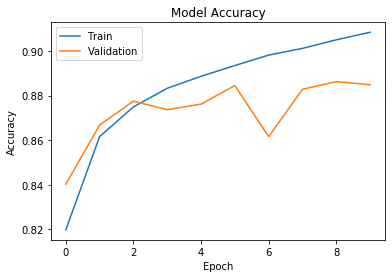

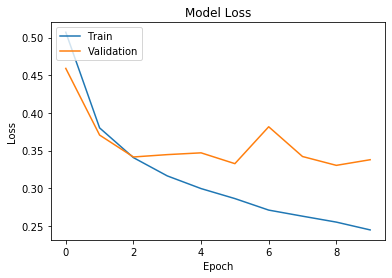

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

Confusion Matrix

In [41]:
from mlxtend.plotting import plot_confusion_matrix

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x33b6c4e0>)

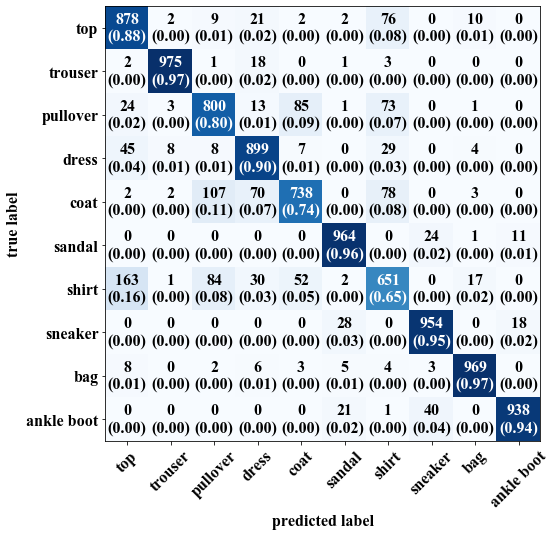

In [55]:
font = {
    'family': 'Times New Roman',
    'size': 16
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(conf_mat = mat, figsize = (8,8), class_names = class_names, show_normed = True)